# Problem Statement

We have to predict BMI, given Gender, Height and Weight

# Data Dictionary

The dataset contains the following columns:

1. **Gender**: The gender of the individual (Male/Female).
2. **Height**: The height of the individual in centimeters.
3. **Weight**: The weight of the individual in kilograms.
4. **Index**: A categorical variable representing the BMI category of the individual:
   - 0: Extremely Weak
   - 1: Weak
   - 2: Normal
   - 3: Overweight
   - 4: Obesity
   - 5: Extreme Obesity

5. **height_m**: The height of the individual in meters.
6. **bmi**: The Body Mass Index (BMI) of the individual.

Note: The `height_m` and `bmi` columns are created during the feature engineering step.

# Steps Performed

1. loading and understanding the data

In [197]:
import pandas as pd

df = pd.read_csv('bmi.csv')

df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


2. Data cleaning

In [ ]:
df.isnull().sum()
#df.dropna()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [9]:
# check for duplicates in the data
df.duplicated().sum()


np.int64(11)

In [47]:
df.isna().sum()

Gender        0
Height        0
Weight        0
Index         0
height_m      0
bmi           0
gender      500
dtype: int64

3. Feature engineering

The Formula for calculating the BMI is: 

BMI = $ Weight (kg) \div Height$ $(m)^2$

So we need to convert the centimeters to meter

In [198]:
df['height_m'] = df['Height'] / 100 # convert height to meters

df['bmi'] = df['Weight'] / df['height_m']**2 # calculate BMI

4. EDA

Gender Distribution

<Axes: xlabel='Gender', ylabel='count'>

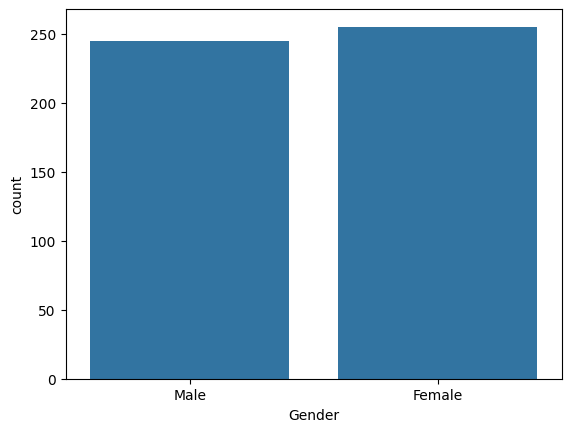

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Gender', data=df)

BMI distribution

<Axes: xlabel='Index', ylabel='Count'>

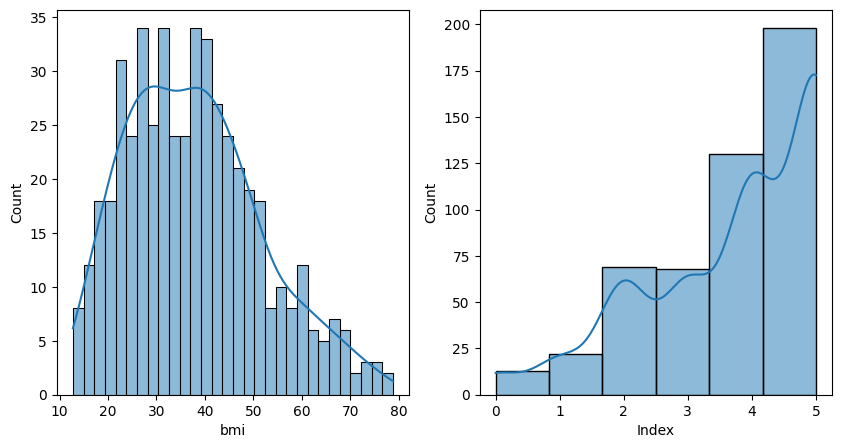

In [307]:
# plot two histograms of bmi and index
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['bmi'], bins=30, kde=True)
plt.subplot(1,2,2)
sns.histplot(df['Index'], bins=6, kde=True)

BMI by gender

<Axes: xlabel='Gender', ylabel='bmi'>

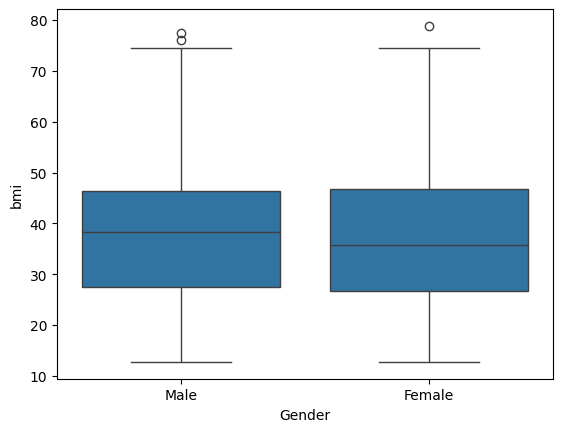

In [32]:
sns.boxplot(x='Gender', y='bmi', data=df)

Correlation matrix

<Axes: >

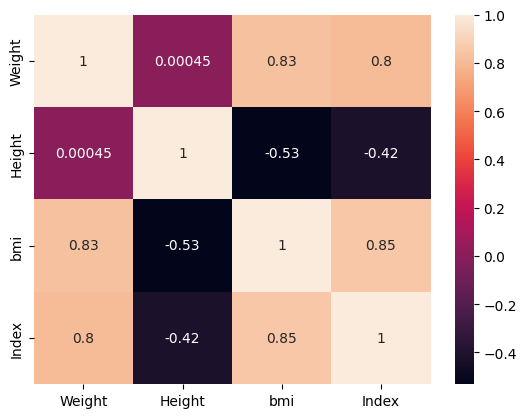

In [34]:
sns.heatmap(df[['Weight','Height','bmi','Index']].corr(), annot=True)

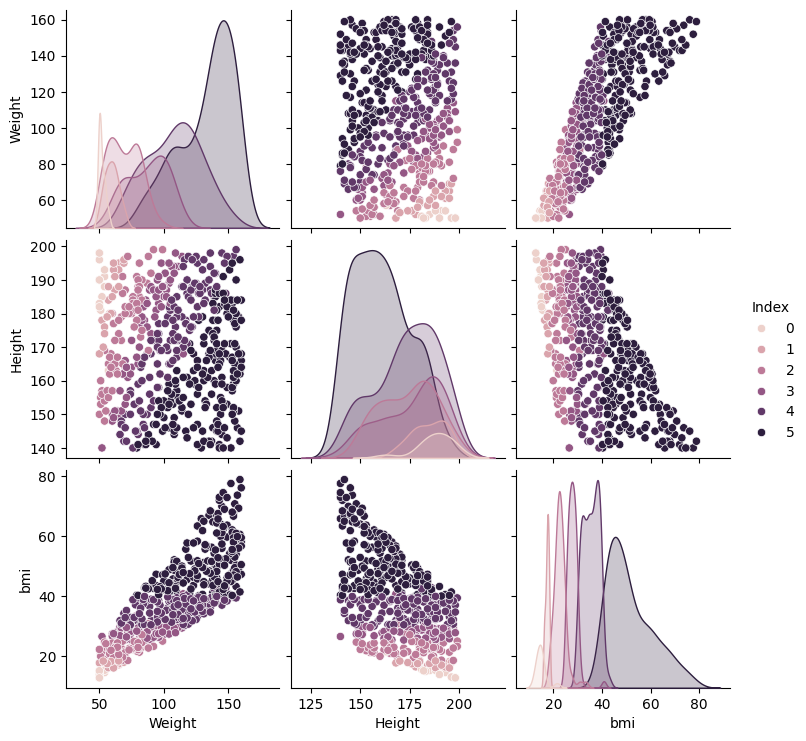

In [36]:
# correlation analysis pairwise
sns.pairplot(df[['Weight','Height','bmi','Index']], hue='Index')

BMI Index

<Axes: xlabel='Index', ylabel='bmi'>

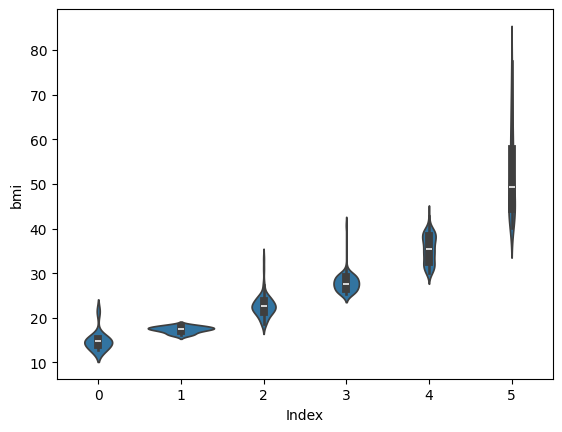

In [37]:
sns.violinplot(x='Index', y='bmi', data=df)

### Insights & Summary

from our analysis we can see:

1. Gender distribution
2. BMI patterns
3. Relationships between BMI and other factors
4. Index definition of certain BMI value(s)

5. Model building

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


Splitting data

In [294]:
# Preprocessing
df['gender'] = df['Gender'].map({'Male': 0, 'Female':1})

x = df[['gender','Height','Weight']]
y = df['Index']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [295]:
# Model 1: Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(x_train_scaled, y_train)
y_pred = lin_reg.predict(x_test_scaled)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Linear Regression RMSE: {rmse}')

Linear Regression RMSE: 0.5967716876119243


In [296]:
# Model 2: Decision Tree Regressor

dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(x_train_scaled, y_train)
y_pred = dt_reg.predict(x_test_scaled)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Decision Tree Regressor RMSE: {rmse}')

Decision Tree Regressor RMSE: 0.46188021535170065


In [297]:
# Model 3: Random Forest Regressor

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(x_train_scaled, y_train)
y_pred = rf_reg.predict(x_test_scaled)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Random Forest Regressor RMSE: {rmse}')

Random Forest Regressor RMSE: 0.33434014615856905


In [298]:
# Model 4: XGBoost Regressor

xgb_reg = xgb.XGBRegressor(random_state=42)
xgb_reg.fit(x_train_scaled, y_train)
y_pred = xgb_reg.predict(x_test_scaled)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'XGBoost Regressor RMSE: {rmse}')

XGBoost Regressor RMSE: 0.36309616952712626


6. Model's performance comparison

In [299]:
# Cross validation, 10 folds
from sklearn.model_selection import cross_val_score

# Linear Regression
lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, x_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
rmse = np.sqrt(-scores).mean()
print(f'Linear Regression RMSE: {rmse}')

# Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(dt_reg, x_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
rmse = np.sqrt(-scores).mean()
print(f'Decision Tree Regressor RMSE: {rmse}')

# Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
scores = cross_val_score(rf_reg, x_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
rmse = np.sqrt(-scores).mean()
print(f'Random Forest Regressor RMSE: {rmse}')

# XGBoost Regressor
xgb_reg = xgb.XGBRegressor(random_state=42)
scores = cross_val_score(xgb_reg, x_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
rmse = np.sqrt(-scores).mean()
print(f'XGBoost Regressor RMSE: {rmse}')


Linear Regression RMSE: 0.5577691163836086
Decision Tree Regressor RMSE: 0.4368038005259892
Random Forest Regressor RMSE: 0.33213724002263245
XGBoost Regressor RMSE: 0.3775855692667399


Random Forest Regressor scores better and therefore will be chosen as the final model. Decision is made by knowing that the dataset is simple and while it is good to hypertune for better performances, we will keep it simple and easy.

7. Feature importance

In [300]:
final_model = rf_reg
final_model.fit(x_train_scaled, y_train)

# Get the feature importances
feature_importances = final_model.feature_importances_

# Create a DataFrame to display the feature importances
feature_names = x_train.columns
importance_df =pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

  Feature  Importance
2  Weight    0.761070
1  Height    0.236131
0  gender    0.002799


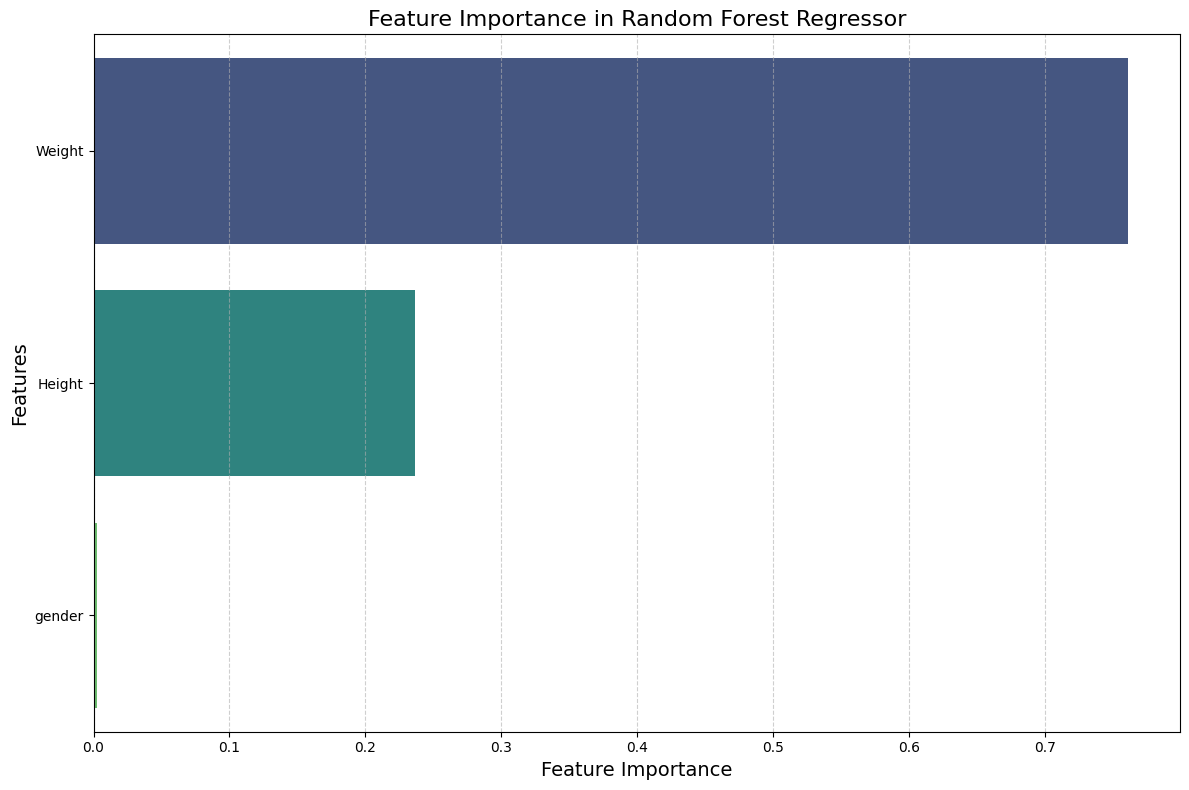

In [301]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fitting the Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(x_train_scaled, y_train)

# Getting feature importances
importances = rf_reg.feature_importances_

# Pairing feature names with their importance
feature_importance_dict = dict(zip(feature_names, importances))

# Sorting features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Separating features and importance for plotting
features = [feature for feature, importance in sorted_features]
importance_values = [importance for feature, importance in sorted_features]

# Creating a Seaborn barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=importance_values, y=features, hue=features, dodge=False, palette="viridis", legend=False)
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance in Random Forest Regressor', fontsize=16)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


7.5 Checking for overfitting or underfitting

In [302]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
import numpy as np

# Cross-validate model on training set
y_train_pred = cross_val_predict(final_model, x_train_scaled, y_train, cv=5)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f'Training RMSE (cross-validation): {train_rmse}')

# Evaluate model on the full dataset or validation set (optional)
y_val_pred = cross_val_predict(final_model, x_test_scaled, y_test, cv=5)
val_rmse = np.sqrt(mean_squared_error(y_test, y_val_pred))
print(f'Validation RMSE (cross-validation): {val_rmse}')

# Compare the results
threshold = 0.2  # Define an acceptable difference range
if abs(train_rmse - val_rmse) > threshold:
    if train_rmse < val_rmse:
        print("The model might be overfitting.")
    elif train_rmse > val_rmse:
        print("The model might be underfitting.")
else:
    print("The model has a good fit.")


Training RMSE (cross-validation): 0.3487860580437731
Validation RMSE (cross-validation): 0.42863970884648567
The model has a good fit.


## Attempt to Hypertune parameters

In [303]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train_scaled, y_train)

# Get the best model
best_rf_reg = grid_search.best_estimator_

# Cross-validate model on training set
y_train_pred = cross_val_predict(best_rf_reg, x_train_scaled, y_train, cv=5)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f'Training RMSE (cross-validation): {train_rmse}')

# Evaluate model on the full dataset or validation set (optional)
y_val_pred = cross_val_predict(best_rf_reg, x_test_scaled, y_test, cv=5)
val_rmse = np.sqrt(mean_squared_error(y_test, y_val_pred))
print(f'Validation RMSE (cross-validation): {val_rmse}')

# Compare the results
threshold = 0.2  # Define an acceptable difference range
if abs(train_rmse - val_rmse) > threshold:
    if train_rmse < val_rmse:
        print("The model might be overfitting.")
    elif train_rmse > val_rmse:
        print("The model might be underfitting.")
else:
    print("The model has a good fit.")


Training RMSE (cross-validation): 0.3433288560154982
Validation RMSE (cross-validation): 0.4250136828250627
The model has a good fit.


In [304]:
# Predict test data 

y_test_pred = best_rf_reg.predict(x_test_scaled)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Test RMSE: {test_rmse}')


Test RMSE: 0.3306584521491013


Save model

In [305]:
import joblib

# Save the best model to a file
model_filename = 'best_rf_model.joblib'
joblib.dump(best_rf_reg, model_filename)
print(f'Model saved to {model_filename}')

Model saved to best_rf_model.joblib


Load and use model on new data

In [308]:
import joblib
import numpy as np

# Load the saved model
model_filename = 'best_rf_model.joblib'
loaded_model = joblib.load(model_filename)
print(f'Model loaded from {model_filename}')

# Example data for new prediction
example_data = np.array([[0, 180, 80]])  # Gender: Male (0), Height: 180 cm, Weight: 80kg
example_features = ['gender', 'Height', 'Weight']
example_data = pd.DataFrame(example_data, columns=example_features)
scaled_data = scaler.transform(example_data)

# Make a prediction
predicted_bmi = loaded_model.predict(scaled_data)
print(f'Predicted BMI-Index: {predicted_bmi[0]}')

Model loaded from best_rf_model.joblib
Predicted BMI-Index: 2.1293174603174605


# 8. Conclusion

We aimed to predict Body Mass Index (BMI) using a dataset containing gender, height, and weight information. We performed data cleaning, feature engineering, exploratory data analysis, and built multiple regression models. The Random Forest Regressor was selected as the final model becuase of its lower RMSE score in comparison to the other models built.


**Model Performance:**
- Training RMSE: 0.343
- CV RMSE: 0.425
- Test RMSE: 0.330


### 9. Next Steps
Further improvements can be made by the following steps:

1. **Gather More Data**: Collect more data to help the model generalize better.
2. **Hyperparameter Tuning**: Continue tuning hyperparameters to find the optimal settings.
5. **Model Deployment**: Lastly, if the model meets performance requirements, consider deploying it to a production environment.

By following these steps, we can enhance the model's performance and gain deeper insights into the factors influencing BMI.